# [아기 상어](https://www.acmicpc.net/problem/16236)

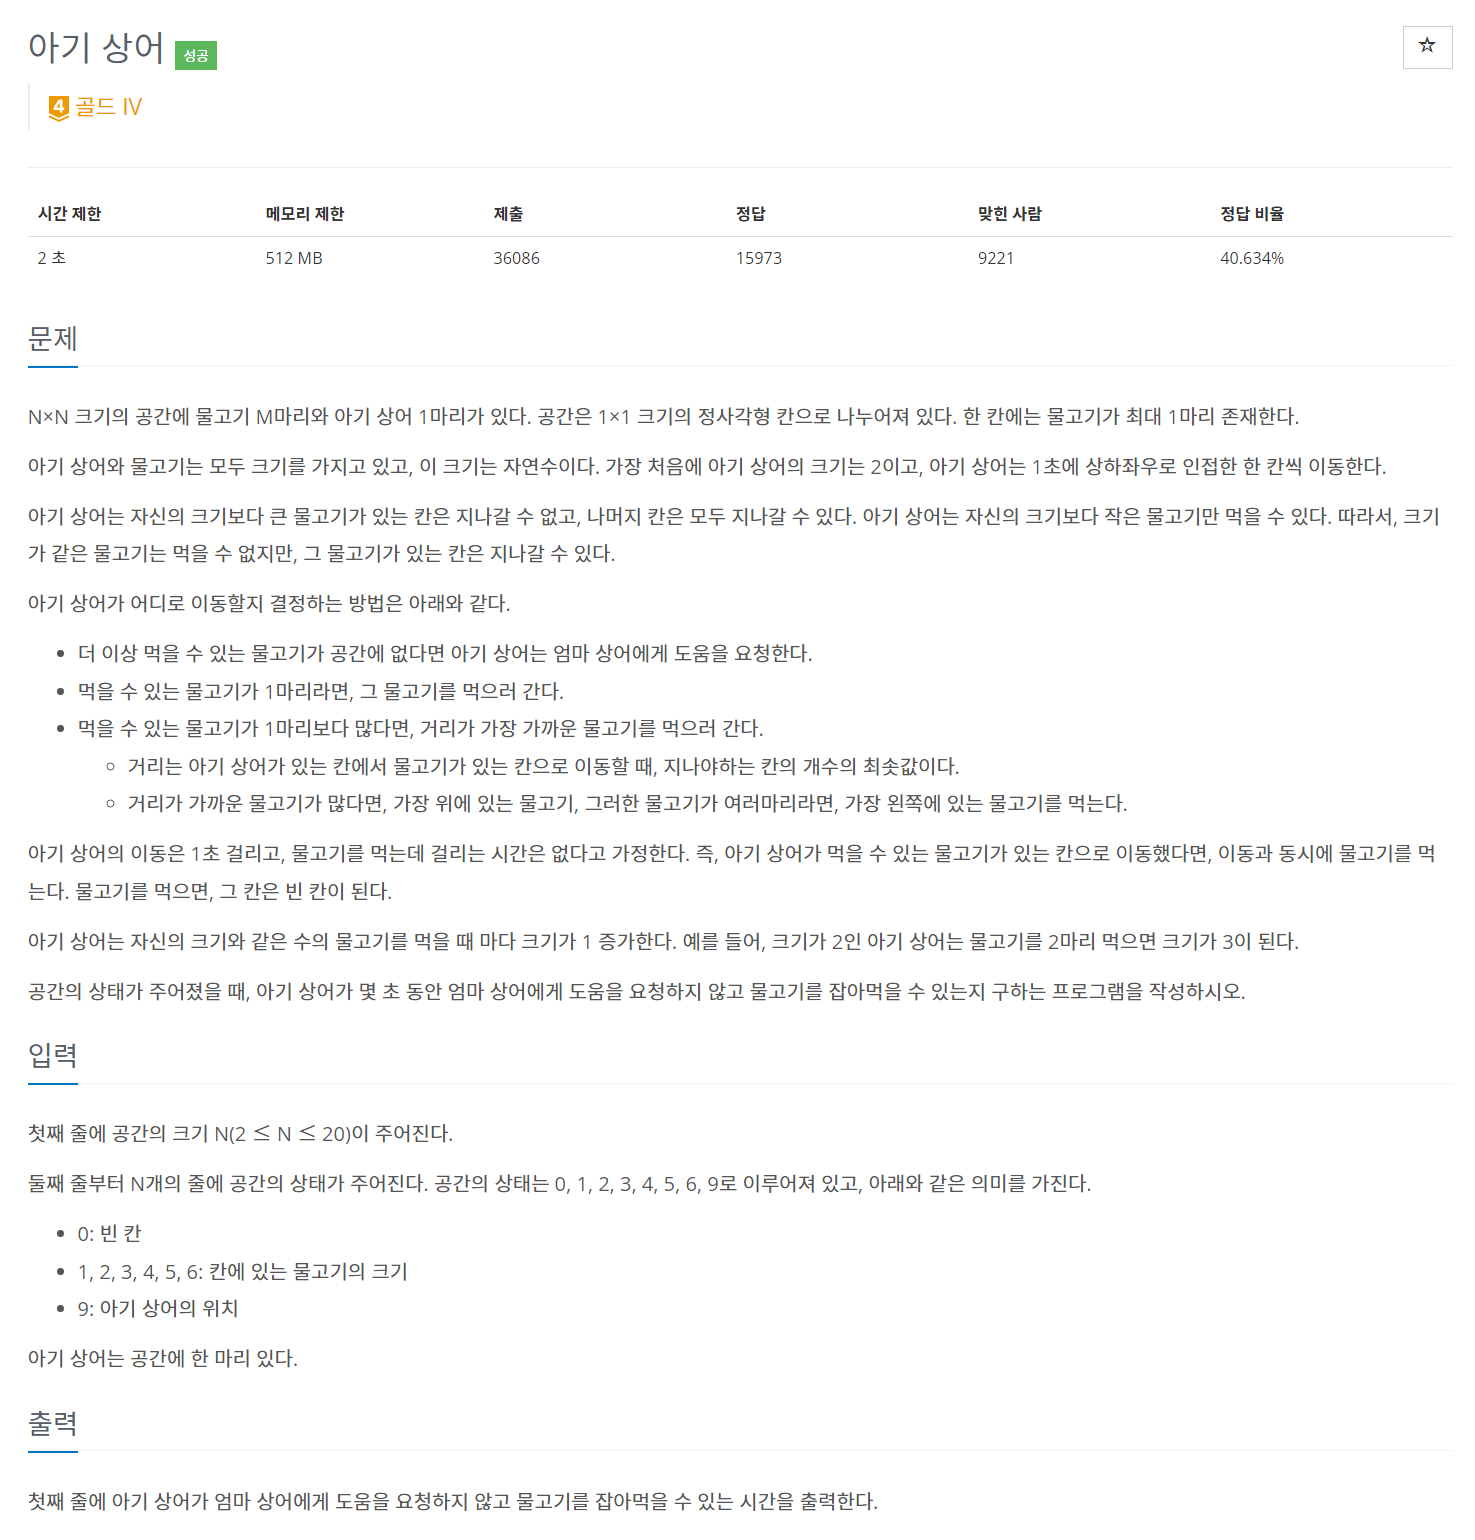

### 단순 구현이므로 그림 없음!

In [ ]:
import sys
from collections import deque

input = sys.stdin.readline

N = int(input())
M = 0
graph = [list(map(int, input().split())) for _ in range(N)]
sx, sy = 0, 0
for i in range(N):
    for j in range(N):
        if graph[i][j] == 9:
            sx, sy = i, j
            graph[i][j] = 0 # 빈 칸으로 만들어둔다.
            break

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]
size = 2
time = 0
eat = 0


while True:
    q = deque()
    visited = [[False]*N for _ in range(N)]
    visited[sx][sy] = True # 아기 상어의 첫 시작점
    q.append((sx, sy, 0))
    mintime = int(1e9)
    eat_wait = []
    while q:
        x, y, t = q.popleft()

        if t > mintime:  # t가 같아야 거리가 같은 물고기들을 비교할 수 있음
            break
        for k in range(4):
            nx, ny = x+dx[k], y+dy[k]
            if 0 <= nx < N and 0 <= ny < N and not visited[nx][ny]:
                if graph[nx][ny] > size:
                    continue
                visited[nx][ny] = True
                if 0 < graph[nx][ny] < size:
                    eat_wait.append((nx, ny, t+1))
                    mintime = t
                q.append((nx, ny, t+1))
    if len(eat_wait):
        eat_wait.sort()  # x,y순으로 정렬 더 높고, 더 왼쪽인게 0번 인덱스로.
        time += eat_wait[0][2]
        eat += 1
        sx, sy = eat_wait[0][0], eat_wait[0][1]
        graph[sx][sy] = 0  # 물고기 냠냠
        if eat == size:
            eat = 0
            size += 1
    else:
        break

print(time)
